#Problem Statement
City and Resort hotels company have seen high cancellation rates. That leads to the fewer revenues and less uses of hotel room.
As subjects to that hotel company are facing haavy losses.
As a business analyst we have to address this problem and find suggestions.

#Reserch Questions
1. What are the variables that affects hotel reservation cancellations?
2. How can we make hotel reservations cancellations better?
3. How will hotels be assisted in making pricing and promotional decisions?

#Hypothesis
1. More cancellations occur when prices are higher.
2. When there is no longer waiting list, customer tend to cancle more frequently.
3. The majority of clients are coming from the offline travel to make their reservations.

#Importing library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#Load the dataset

In [ ]:
hdata = pd.read_csv('/content/hotelbooking.csv')

#Exploratory Data Analysis and Data Cleaning

In [ ]:
hdata.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
hdata.tail(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06,9
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07,9
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07,9
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07,9
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,0,No Deposit,0,Transient,151.20,0,2,Check-Out,2017-09-07,9


In [ ]:
hdata.shape

(119390, 32)

In [ ]:
hdata.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
hdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
hdata['reservation_status_date'] = pd.to_datetime(hdata['reservation_status_date'], format='%d/%m/%Y', errors='coerce')

In [ ]:
hdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [ ]:
hdata.describe(include = 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [ ]:
for col in hdata.describe(include = 'object').columns:
  print(col)
  print(hdata[col].unique())

hotel
['Resort Hotel' 'City Hotel']
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IR

In [ ]:
hdata.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [ ]:
hdata.dropna(inplace = True)


In [ ]:
hdata.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [ ]:
hdata.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683,2016-07-30 07:37:53.336809984
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678,NaN


<Axes: >

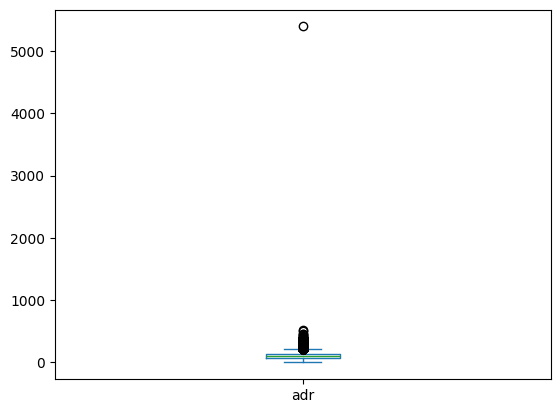

In [ ]:
hdata['adr'].plot(kind = 'box')

In [ ]:
hdata = hdata[hdata['adr']<5000]

#Data Analysis and Visulization

is_canceled
0    0.628653
1    0.371347
Name: proportion, dtype: float64


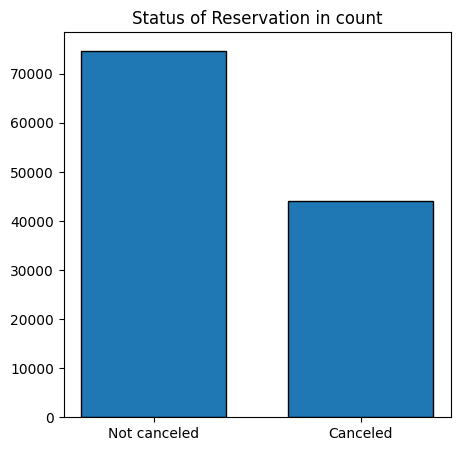

In [ ]:
cancelled_perc = hdata['is_canceled'].value_counts(normalize = True)
print(cancelled_perc)

plt.figure(figsize = (5,5))
plt.title('Status of Reservation in count')
plt.bar(['Not canceled', 'Canceled'], hdata['is_canceled'].value_counts(), edgecolor = 'black', width = 0.7)
plt.show()

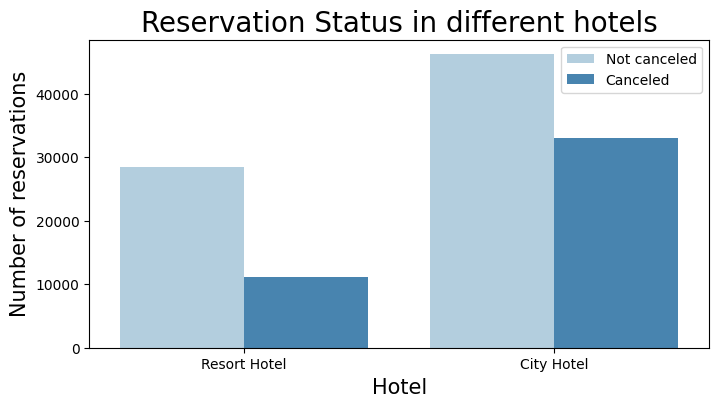

In [ ]:
plt.figure(figsize = (8,4))
ax1 = sns.countplot(x = 'hotel', hue = 'is_canceled', data = hdata, palette = 'Blues')

plt.title('Reservation Status in different hotels', size = 20)
plt.xlabel('Hotel', size = 15)
plt.ylabel('Number of reservations', size = 15)
plt.legend(bbox_to_anchor = (1,1))
plt.legend(['Not canceled', 'Canceled'])
plt.show()

In [ ]:
resort_hotel = hdata[hdata['hotel'] == 'Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize = True)


,proportion
is_canceled,
0,0.72025
1,0.27975


In [ ]:
city_hotel = hdata[hdata['hotel'] == 'City Hotel']
city_hotel['is_canceled'].value_counts(normalize = True)


,proportion
is_canceled,
0,0.582918
1,0.417082


In [ ]:
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()

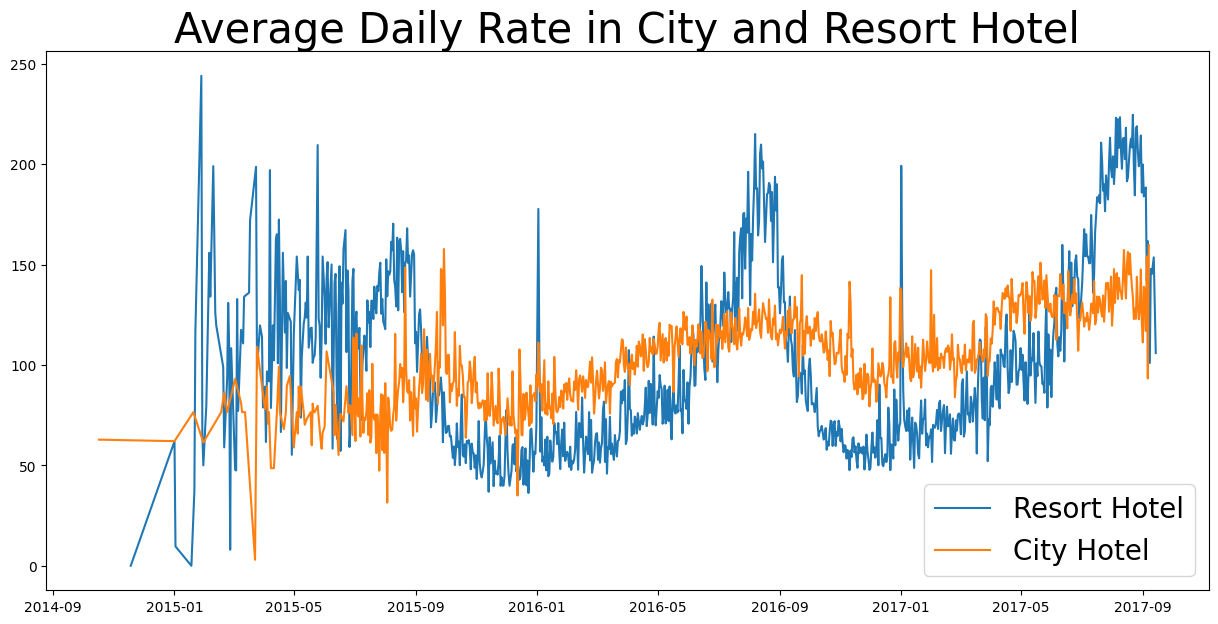

In [ ]:
plt.figure(figsize = (15,7))
plt.title('Average Daily Rate in City and Resort Hotel', fontsize = 30)
plt.plot(resort_hotel.index, resort_hotel['adr'], label = 'Resort Hotel')
plt.plot(city_hotel.index, city_hotel['adr'], label = 'City Hotel')
plt.legend(fontsize = 20)
plt.show()

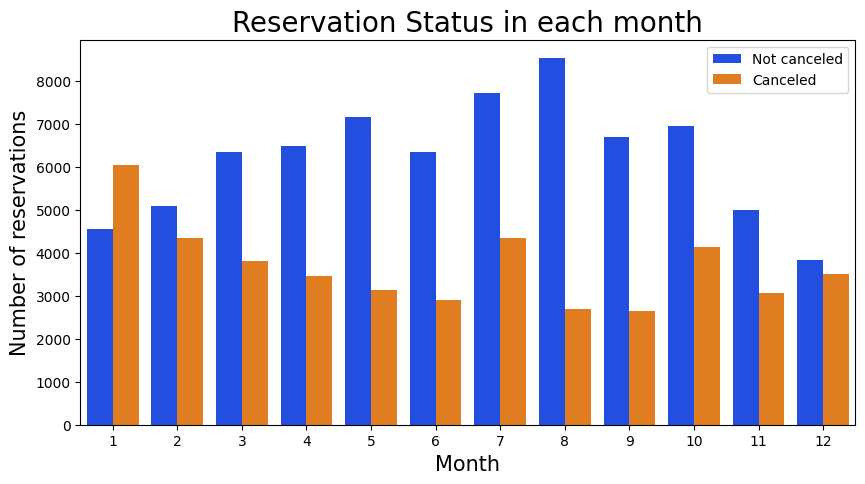

In [ ]:
hdata['month'] = hdata['reservation_status_date'].dt.month
plt.figure(figsize = (10,5))
ax1 = sns.countplot(x = 'month', hue = 'is_canceled', data = hdata, palette = 'bright')
legend_labels, _ = ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor = (1,1))
plt.title('Reservation Status in each month', size = 20)
plt.xlabel('Month', size = 15)
plt.ylabel('Number of reservations', size = 15)
plt.legend(bbox_to_anchor = (1,1))
plt.legend(['Not canceled', 'Canceled'])
plt.show()

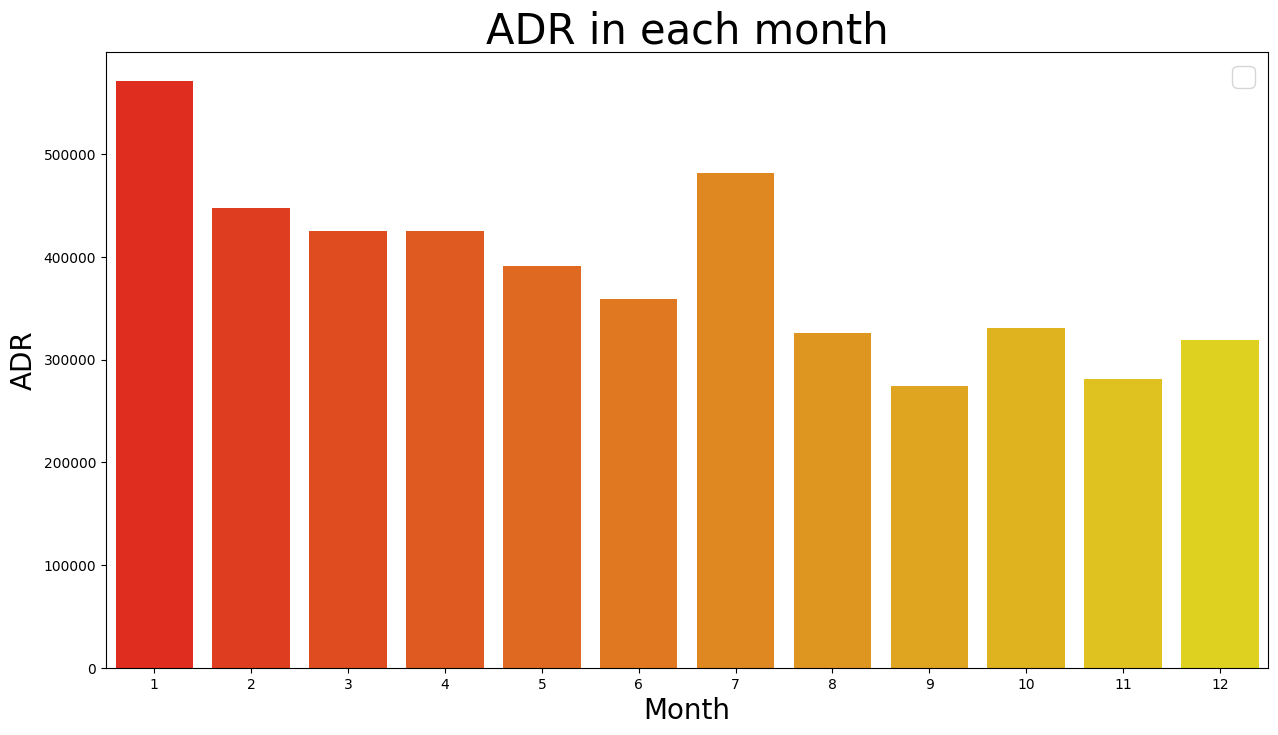

In [ ]:
plt.figure(figsize = (15,8))
plt.title('ADR in each month', fontsize = 30)

sns.barplot(x='month', y='adr', data=hdata[hdata['is_canceled'] == 1].groupby('month')[['adr']].sum().reset_index(), palette='autumn')
plt.legend(fontsize = 20)
plt.xlabel('Month', fontsize = 20)
plt.ylabel('ADR', fontsize = 20)
plt.show()

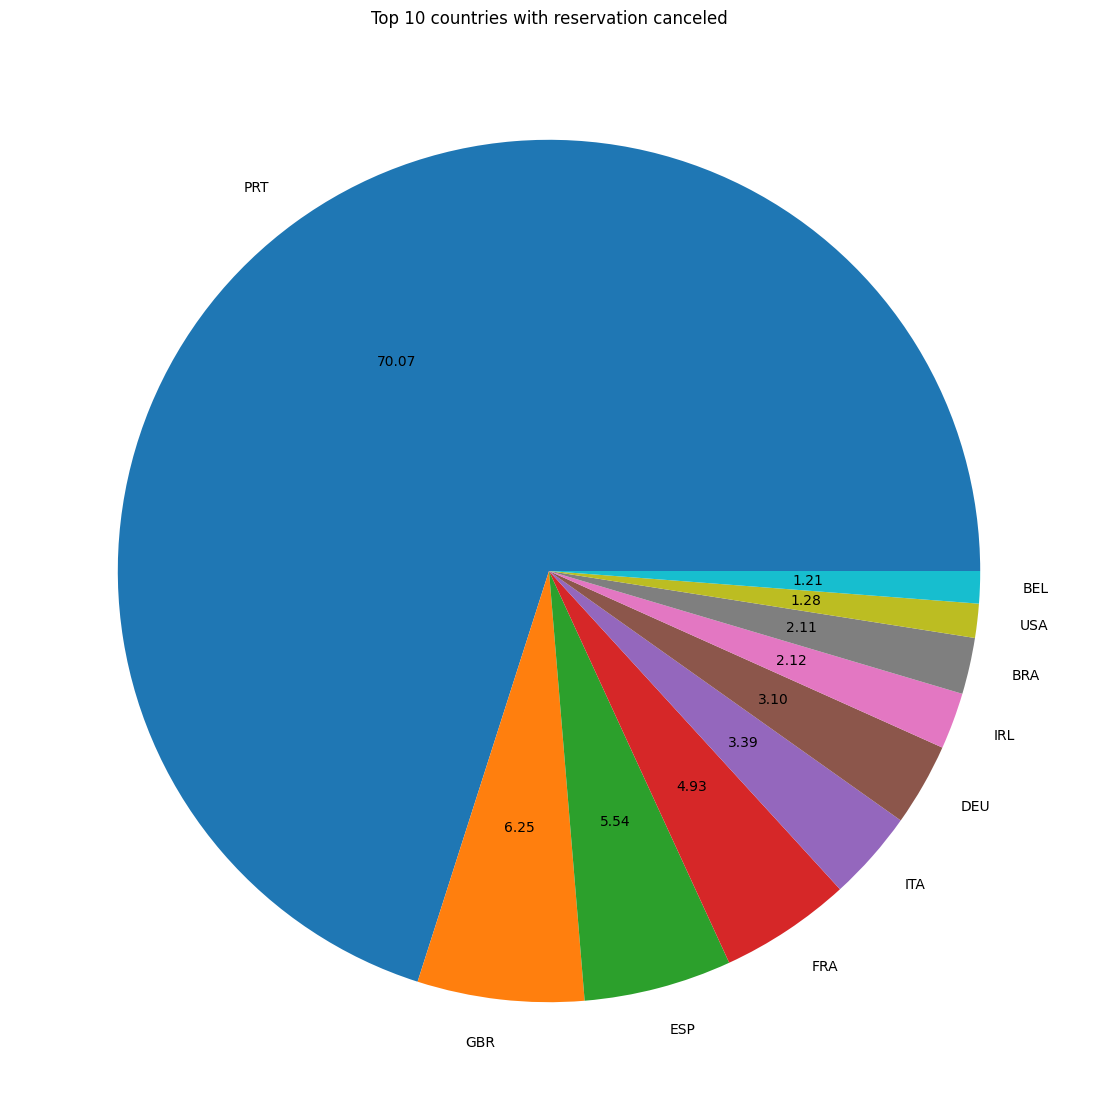

In [ ]:
cancelled_data = hdata[hdata['is_canceled'] == 1]
top_10_country = cancelled_data['country'].value_counts()[:10]
plt.figure(figsize = (14,14))
plt.title('Top 10 countries with reservation canceled')
plt.pie(top_10_country, autopct = '%.2f', labels = top_10_country.index)
plt.show()


In [ ]:
hdata['market_segment'].value_counts(normalize = True)

,proportion
market_segment,
Online TA,0.474377
Offline TA/TO,0.203193
Groups,0.166581
Direct,0.104696
Corporate,0.042987
Complementary,0.006173
Aviation,0.001993


In [ ]:
cancelled_data['market_segment'].value_counts(normalize = True)

,proportion
market_segment,
Online TA,0.469696
Groups,0.273985
Offline TA/TO,0.187466
Direct,0.043486
Corporate,0.022151
Complementary,0.002038
Aviation,0.001178


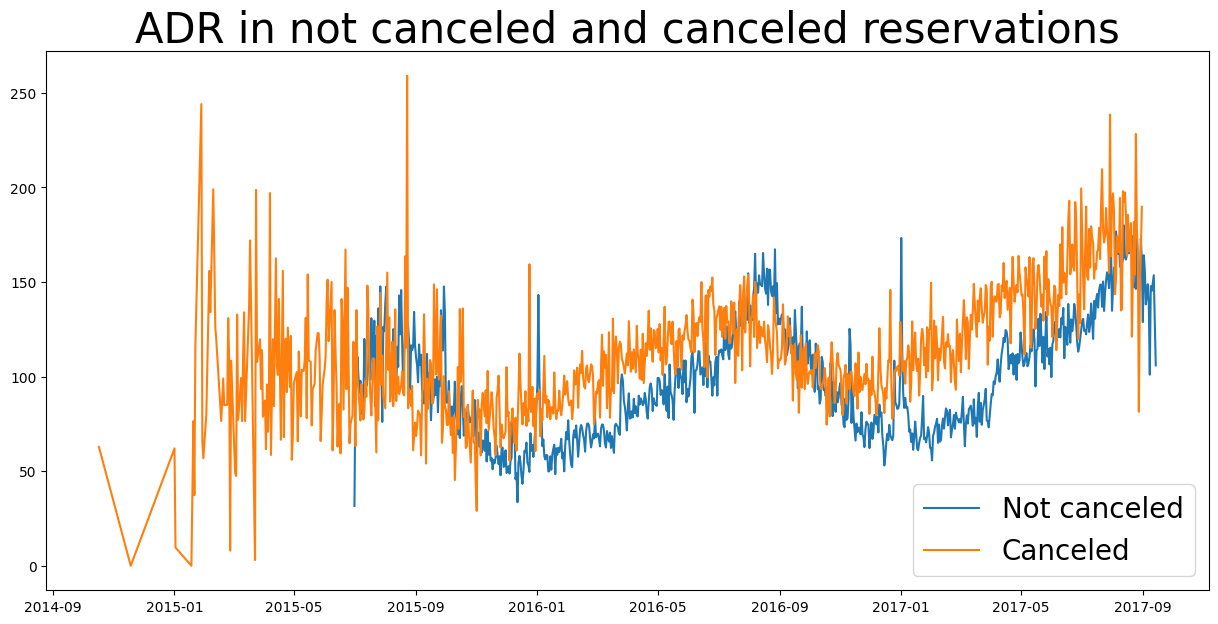

In [ ]:
cancelled_hdata_adr = cancelled_data.groupby('reservation_status_date')[['adr']].mean()
cancelled_hdata_adr.reset_index(inplace = True)
cancelled_hdata_adr.sort_values('reservation_status_date', inplace = True)

not_cancelled_data = hdata[hdata['is_canceled'] == 0]
not_cancelled_hdata_adr = not_cancelled_data.groupby('reservation_status_date')[['adr']].mean()
not_cancelled_hdata_adr.reset_index(inplace = True)
not_cancelled_hdata_adr.sort_values('reservation_status_date', inplace = True)

plt.figure(figsize = (15,7))
plt.title('ADR in not canceled and canceled reservations', fontsize = 30)
plt.plot(not_cancelled_hdata_adr['reservation_status_date'], not_cancelled_hdata_adr['adr'], label = 'Not canceled')
plt.plot(cancelled_hdata_adr['reservation_status_date'], cancelled_hdata_adr['adr'], label = 'Canceled')
plt.legend(fontsize = 20)
plt.show()

In [ ]:
cancelled_hdata_adr = cancelled_hdata_adr[(cancelled_hdata_adr['reservation_status_date'] > '2016') & (cancelled_hdata_adr['reservation_status_date'] < '2017')]
not_cancelled_hdata_adr = not_cancelled_hdata_adr[(not_cancelled_hdata_adr['reservation_status_date'] > '2016') & (not_cancelled_hdata_adr['reservation_status_date'] < '2017')]

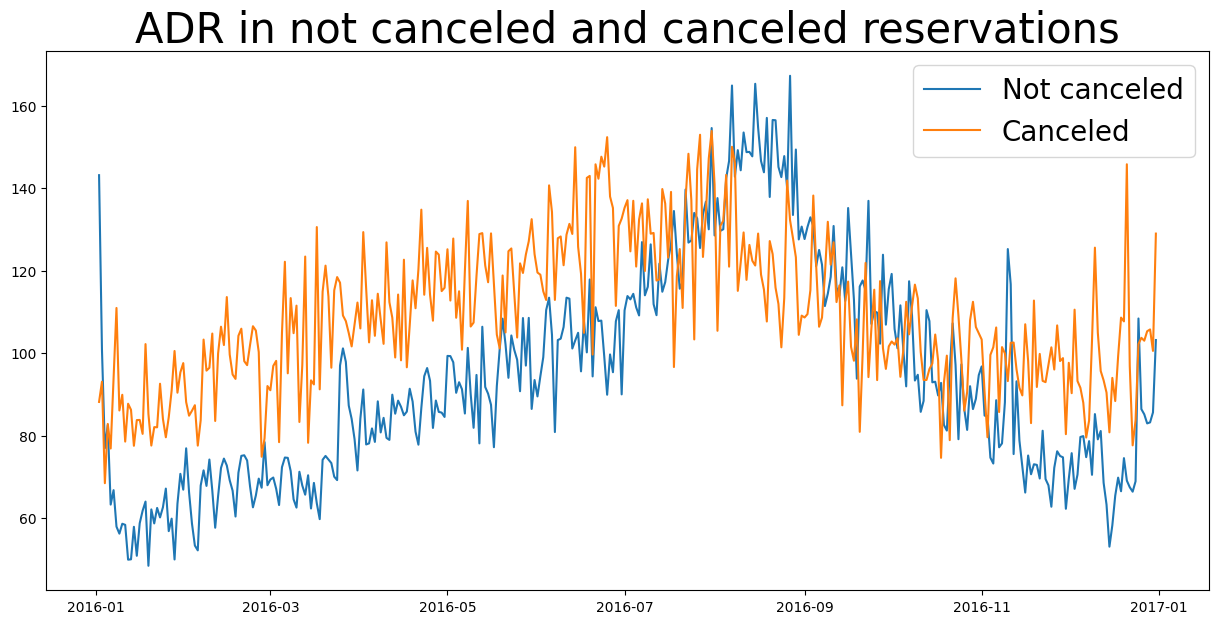

In [ ]:
plt.figure(figsize = (15,7))
plt.title('ADR in not canceled and canceled reservations', fontsize = 30)
plt.plot(not_cancelled_hdata_adr['reservation_status_date'], not_cancelled_hdata_adr['adr'], label = 'Not canceled')
plt.plot(cancelled_hdata_adr['reservation_status_date'], cancelled_hdata_adr['adr'], label = 'Canceled')
plt.legend(fontsize = 20)
plt.show()

#Suggestions with respect to the findings itself
1. Cancellation rates rise as the price does.
-To stop cancellation of reservations, company could work on their pricing stretegies to implement that, opt for the dynamic pricing models for predicting demand and adjust the pricing according itself and assign more resonable and accurate pricing which is more suitable for the current time period.
2. As per the ratio for cancellation anf not cancellation is higher in the resort hotel than the city hotels.
-To inculcate that implement resonable discount in the weekends and holidays.
3. Higher cancellation rate region can implement,
-improve the quality of ervices and the rooms could give benifit for the company.